In [2]:
import numpy as np  # as always import the ness packages / libraries. 
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt


In [3]:
class DataTransform: # use the DataTransfrom class change to the right dtypes form the .csv df. 
    def __init__(self, df):
        if not isinstance(df, pd.DataFrame):
            raise ValueError("Input must be a Pandas DataFrame.")
        self.df = df

    def change_dtypes(self, dtype_dict):
        try:
            for column, dtype in dtype_dict.items():
                if column in self.df.columns:
                    if dtype == "datetime64":
                        self.df[column] = pd.to_datetime(self.df[column], errors='coerce')
                    elif dtype == "boolean":
                        self.df[column] = self.df[column].map({'y': True, 'n': False})
                    else:
                        self.df[column] = self.df[column].astype(dtype, errors='ignore')
                else:
                    raise KeyError(f"Column '{column}' not found in DataFrame.")
            return self.df
        except Exception as e:
            raise RuntimeError(f"Error whilst changing datatypes: {e}")

if __name__ == "__main__":
    df_og = pd.read_csv("/Users/max/coding_resources/finance_loan_project/flp_df/flp_df7_4analysis.csv")

    transformer = DataTransform(df_og)

    dtype_dict = {
        "id": "int64",
        "member_id": "int64",
        "loan_amount": "float64",
        "term": "category", 
        "int_rate": "float64",
        "grade": "category",
        "sub_grade": "category",
        "employment_length": "category",
        "home_ownership": "category",
        "annual_inc": "float64",
        "verification_status": "category",
        "issue_date": "datetime64",
        "loan_status": "category",
        "payment_plan": "bool",
        "purpose": "category",
        "dti": "float64",
        "delinq_2yrs": "int64",
        "earliest_credit_line": "datetime64",
        "inq_last_6mths": "int64",
        "open_accounts": "int64",
        "total_accounts": "int64",
        "out_prncp": "float64",
        "total_payment": "float64",
        "total_rec_int": "float64",
        "total_rec_late_fee": "float64",
        "recoveries": "float64",
        "collection_recovery_fee": "float64",
        "last_payment_date": "datetime64",
        "last_payment_amount": "float64",
        "last_credit_pull_date": "datetime64",
        "collections_12_mths_ex_med": "category",
        "policy_code": "int64",
        "application_type": "category"
    }

    df_fin_x = transformer.change_dtypes(dtype_dict)

df_fin = df_fin_x.drop(columns=["Unnamed: 0"])
    
print(df_fin)

             id  member_id  loan_amount  funded_amount  funded_amount_inv  \
0      13297208   15339420       8950.0         8950.0             8950.0   
1      10234817   12096968      11200.0        11200.0            11200.0   
2      10234813   12096964       8400.0         8400.0             8400.0   
3      10234796   12096947       9600.0         9600.0             9600.0   
4      10234755   12096906      15000.0        12000.0            15000.0   
...         ...        ...          ...            ...                ...   
20493    121673     121283       4500.0         4500.0             3000.0   
20494    120215     118760       4000.0         4000.0             3575.0   
20495    112245     112227       5000.0         5000.0             3975.0   
20496    111227     111223      20000.0        20000.0             2800.0   
20497     88046      88023       4400.0         4400.0             1400.0   

            term   int_rate  instalment grade sub_grade  ... total_rec_int 

In [4]:
class Plotter:
    def __init__(self, dataframe, default_palette="viridis"):
        self.dataframe = dataframe
        self.color_palette = sns.color_palette(default_palette)
        sns.set_style("whitegrid")

    def scatterplot(self, x, y, figsize=(8, 6), hue=None, palette=None):
        plt.figure(figsize=figsize)
        sns.scatterplot(data=self.dataframe, x=x, y=y, hue=hue, 
                        palette=palette or self.color_palette)
        plt.title(f"Scatterplot of {x} vs {y}")
        plt.show()

    def histogram(self, column, figsize=(8, 6), bins=25, palette=None):
        plt.figure(figsize=figsize)
        sns.histplot(data=self.dataframe, x=column, bins=bins, kde=True, 
                     palette=palette or self.color_palette)
        plt.title(f"Histogram of {column}")
        plt.show()

    def barplot(self, x, y, hue=None, figsize=(12, 6), palette=None):
        plt.figure(figsize=figsize)
        sns.barplot(data=self.dataframe, x=x, y=y, hue=hue, palette=palette or self.color_palette)
        plt.title(f"Barplot of {y} by {x}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def boxplot(self, x, y, hue=None, figsize=(12, 6), box_width=0.5, palette=None):
        plt.figure(figsize=figsize)
        sns.boxplot(data=self.dataframe, x=x, y=y, hue=hue, width=box_width, 
                    palette=palette or self.color_palette)
        plt.title(f"Boxplot of {y} by {x}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    def stripplot(self, x, y, figsize=(8, 6), hue=None, palette=None):
        plt.figure(figsize=figsize)
        sns.stripplot(data=self.dataframe, x=x, y=y, hue=hue, jitter=True, 
                      palette=palette or self.color_palette)
        plt.title(f"Stripplot of {y} by {x}")
        plt.show()

    def jointplot(self, x, y, kind="scatter", height=6, hue=None, legend_fontsize=10, palette=None):
        g = sns.jointplot(data=self.dataframe, x=x, y=y, kind=kind, hue=hue, 
                          palette=palette or self.color_palette, height=height)
        plt.suptitle(f"Jointplot of {x} and {y}", y=1.02)
        if hue:
            legend = g.ax_joint.legend_
            if legend:
                for text in legend.get_texts():
                    text.set_fontsize(legend_fontsize)
                legend.get_title().set_fontsize(legend_fontsize)
        plt.show()

    def jointplotkde(self, x, y, kind="kde", hue=None, height=6, cmap="viridis", legend_fontsize=10):
        g = sns.jointplot(data=self.dataframe, x=x, y=y, kind=kind, cmap=cmap, hue=hue, fill=True, height=height)
        plt.suptitle(f"Jointplot of {x} and {y}", y=1.02)
        if hue:
            legend = g.ax_joint.legend_
            if legend:
                for text in legend.get_texts():
                    text.set_fontsize(legend_fontsize)
                legend.get_title().set_fontsize(legend_fontsize)
        plt.show()

    def pairplot(self, hue=None, palette=None):
        sns.pairplot(self.dataframe, hue=hue, palette=palette or self.color_palette)
        plt.suptitle("Pairplot", y=1.02)
        plt.show()

    def heatmap(self, figsize=(10, 8), cmap="viridis"):
        numeric_df = self.dataframe.select_dtypes(include=["number"])
        plt.figure(figsize=figsize)
        corr = numeric_df.corr()
        sns.heatmap(corr, annot=True, cmap=cmap, fmt=".2f")
        plt.title("Heatmap of Correlation Matrix")
        plt.show()

    def clustermap(self, figsize=(10, 8), cmap="viridis"):
        numeric_df = self.dataframe.select_dtypes(include=["number"])
        corr = numeric_df.corr()
        sns.clustermap(corr, annot=True, cmap=cmap, fmt=".2f", figsize=figsize)
        plt.show()

    def nulls_barplot(self, figsize=(8, 6), palette=["red", "green"]):
        total_nulls = self.dataframe.isna().sum().sum()
        total_values = self.dataframe.size - total_nulls
        data = pd.DataFrame({"Dcontent": ["Nulls", "Values"], "Count": [total_nulls, total_values]})
        plt.figure(figsize=figsize)
        sns.barplot(data=data, x="Dcontent", y="Count", hue="Dcontent", palette=palette)
        plt.title("Total Nulls vs Total Values")
        plt.ylabel("Count")
        plt.xlabel("")
        plt.show()

In [5]:
def loan_payment_stats(df):  # function to help work out loan payment stats requested. 
    if df['term'].dtype != 'int64': # makes sure term isnt already int64 on multiple use.
        df['term'] = df['term'].str.extract(r'(\d+)').astype('int64') # 
        # turns category into string, extracts the digits from the string (36, 60) and converts into int. 

    df["total_loan_with_interest"] = df["instalment"] * df["term"] # total loan. 

    df["paid_back_in_6_months"] = df["instalment"] * 6 # amount paid in 6 months. 

    total_loan_amount = df['loan_amount'].sum() # using .sum() to add up all the rows in each column. 
    total_loan_with_interest = df['total_loan_with_interest'].sum()
    total_payments = df['total_payment'].sum()
    percentage_total_recovered = round((df['total_payment'].sum() / df['total_loan_with_interest'].sum()) * 100, 2)
    # working out the total percentage of loan value paid back. 
    total_due_in_6_months = df["paid_back_in_6_months"].sum() 

    summary = {
        "Total Loan Value": total_loan_amount,
        "Loan Value with Interest": total_loan_with_interest,
        "Total Value of Payments": total_payments,
        "Percentage of Total Paid (%)": percentage_total_recovered,
        "Payment Due in 6 Months": total_due_in_6_months
    } # creating a dict out the data. 

    summary_df = pd.DataFrame([summary]) # pd df for visualization. 

    return summary_df


In [6]:
loan_payment_stats(df_fin) # print df with desired stats. 

,Total Loan Value,Loan Value with Interest,Total Value of Payments,Percentage of Total Paid (%),Payment Due in 6 Months
0,206022100.0,2.491706e+08,2.021775e+08,81.14,38774110.2


In [8]:
def convert_to_millions(df): # function to convert figures into millions for readability. 
    numeric_cols = df.select_dtypes(include=[np.number]).columns # select for numbers in case need to use again in future.
    df[numeric_cols] = (df[numeric_cols] / 1_000_000).round(2) # in millions to 2dp. 

    return df

In [9]:
df_fin_lp_stats = loan_payment_stats(df_fin)

df_lp_stats_mils = convert_to_millions(df_fin_lp_stats)

df_lp_stats_mils

# more readable figures, although percentage is lost due to the 2 dp. 

,Total Loan Value,Loan Value with Interest,Total Value of Payments,Percentage of Total Paid (%),Payment Due in 6 Months
0,206.02,249.17,202.18,0.0,38.77


/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_18674/4272068302.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=self.dataframe, x=x, y=y, hue=hue, palette=palette or self.color_palette)
/var/folders/p9/8l6hsxms1mg7zkrszrjhyg8r0000gn/T/ipykernel_18674/4272068302.py:23: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.barplot(data=self.dataframe, x=x, y=y, hue=hue, palette=palette or self.color_palette)


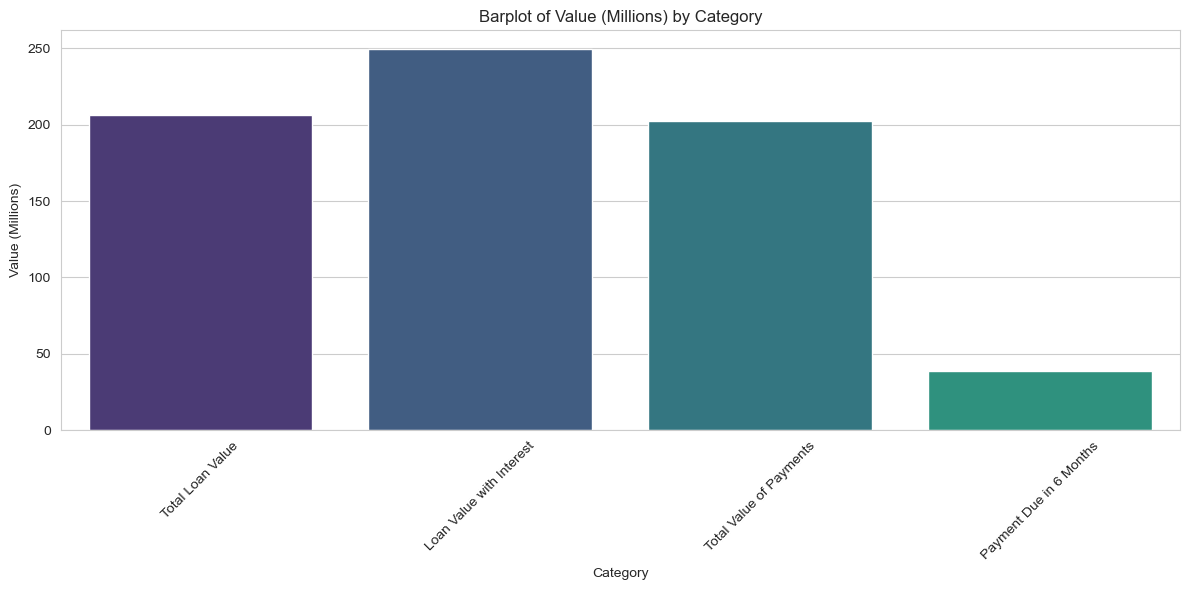

In [10]:
df_lp_stats_mils_drped = df_lp_stats_mils.drop(columns="Percentage of Total Paid (%)")
# drop % as we know it and it's unit differs from the other 4 

df_lp_melt = df_lp_stats_mils_drped.melt(
    var_name="Category",
    value_name="Value (Millions)"
) # melt to data so can visualize all categories on the X axis in the barplot. 

plotter1 = Plotter(df_lp_melt) # use plotter Class. 

plotter1.barplot("Category", "Value (Millions)") # name axes and create barplot.